# Kinetic Model Predictions for eGFP


Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


Accuracy of predictions:
0.7839521776286136
RMSE: 1.4317 g/L


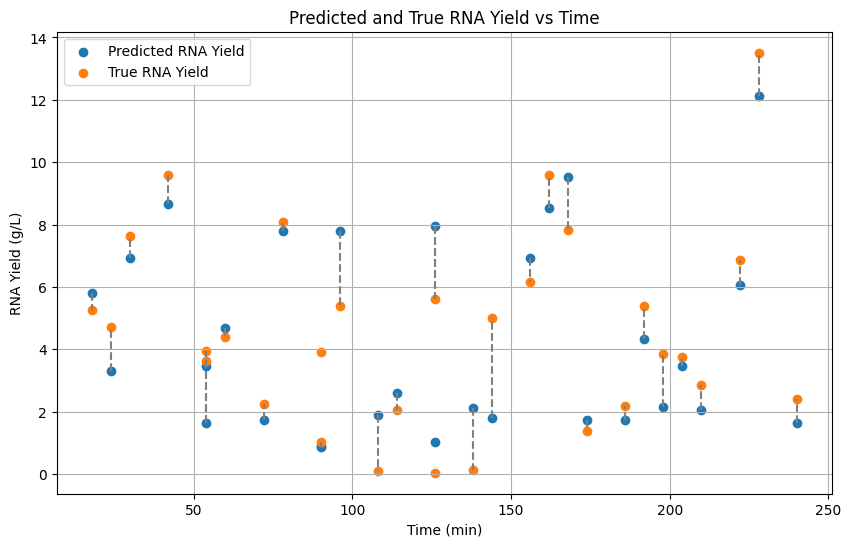

In [2]:
import r3.schema as schema
import r3.adapters as adapters
from matplotlib import pyplot as plt
import r3.models.assimulo.assimulo_model as ivt_model
from sklearn.metrics import r2_score
import numpy as np

X_columns = [
    schema.IVTReactionSchema.NTP_M.value,
    schema.IVTReactionSchema.T7RNAP_u_uL.value,
    schema.IVTReactionSchema.DNA_ug_mL.value,
    schema.IVTReactionSchema.Mg2_M.value,
    schema.IVTReactionSchema.Spd_M.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "egfp_lhs", verbose=False
).get(X_columns=X_columns, y_columns=y_columns)

model = ivt_model.AssimuloIVTModel(template=schema.DNATemplates.eGFP)
predictions = model.predict_rna_yield(
    experimental_conditions=experimental_conditions,
    verbose=False,
)

print("Accuracy of predictions:")
print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

# show root mean squared error
rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)
ax = plt.gca()
for i in experimental_conditions[schema.IVTReactionSchema.TIME_min.value]:
    ax.vlines(
        i,
        predictions.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        response.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        color="gray",
        linestyle="--",
    )

plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)
plt.xlabel("Time (min)")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Time")
plt.legend()
plt.grid()
plt.show()

## Checking if the outlier sample can be removed


Accuracy of predictions after removing sample 11:
0.7061542474622684
RMSE: 1.4335 g/L


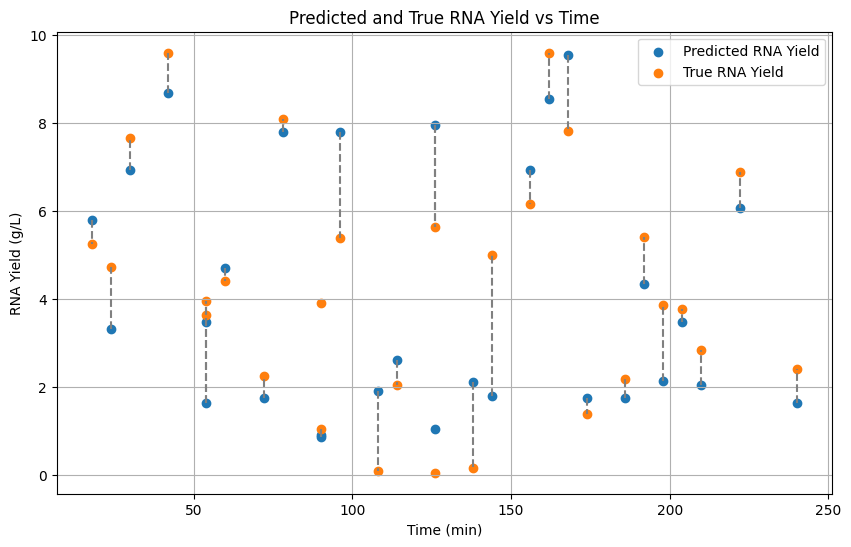

In [3]:
experimental_conditions, response = adapters.DataPipelineAdapter(
    "egfp_lhs", verbose=False
).get(X_columns=X_columns, y_columns=y_columns)

# remove sample 11
experimental_conditions = experimental_conditions.drop(index=[11])
response = response.drop(index=[11])
experimental_conditions = experimental_conditions.reset_index(drop=True)
response = response.reset_index(drop=True)

model = ivt_model.AssimuloIVTModel(template=schema.DNATemplates.eGFP)
predictions = model.predict_rna_yield(
    experimental_conditions=experimental_conditions,
    verbose=False,
)

print("Accuracy of predictions after removing sample 11:")
print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

# show root mean squared error
rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)
ax = plt.gca()
for i in experimental_conditions[schema.IVTReactionSchema.TIME_min.value]:
    ax.vlines(
        i,
        predictions.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        response.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        color="gray",
        linestyle="--",
    )

plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)
plt.xlabel("Time (min)")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Time")
plt.legend()
plt.grid()
plt.show()

## Residual analysis for eGFP predictions


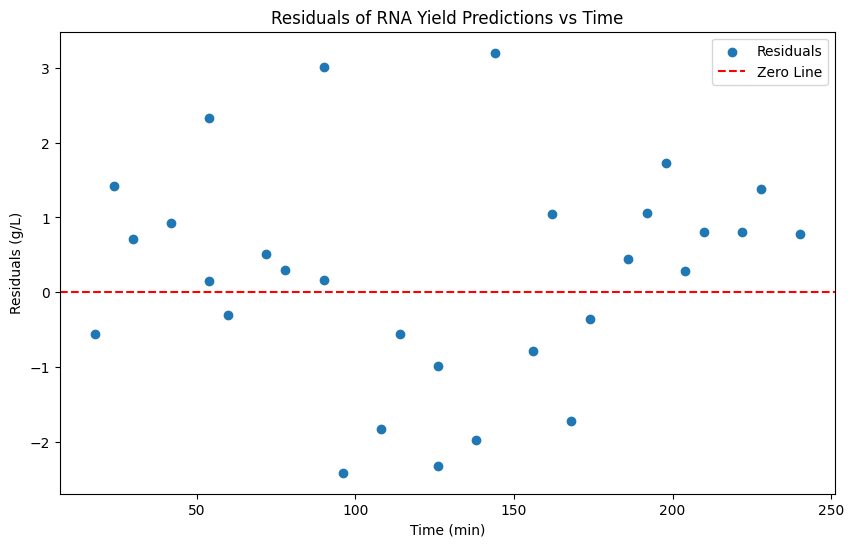

In [4]:
X_columns = [
    schema.IVTReactionSchema.NTP_M.value,
    schema.IVTReactionSchema.T7RNAP_u_uL.value,
    schema.IVTReactionSchema.DNA_ug_mL.value,
    schema.IVTReactionSchema.Mg2_M.value,
    schema.IVTReactionSchema.Spd_M.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "egfp_lhs", verbose=False
).get(X_columns=X_columns, y_columns=y_columns)

model = ivt_model.AssimuloIVTModel(template=schema.DNATemplates.eGFP)
predictions = model.predict_rna_yield(
    experimental_conditions=experimental_conditions,
    verbose=False,
)

# Plot the residuals of the model
residuals = (
    response[schema.IVTReactionSchema.RNA_g_L.value]
    - predictions[schema.IVTReactionSchema.RNA_g_L.value]
)
plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    residuals,
    marker="o",
    label="Residuals",
)
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.xlabel("Time (min)")
plt.ylabel("Residuals (g/L)")
plt.title("Residuals of RNA Yield Predictions vs Time")
plt.legend()

Lilliefors test statistic: 0.1089, p-value: 0.4748
The residuals follow a normal distribution (fail to reject H0).


Text(0.5, 1.0, 'Distribution of Residuals')

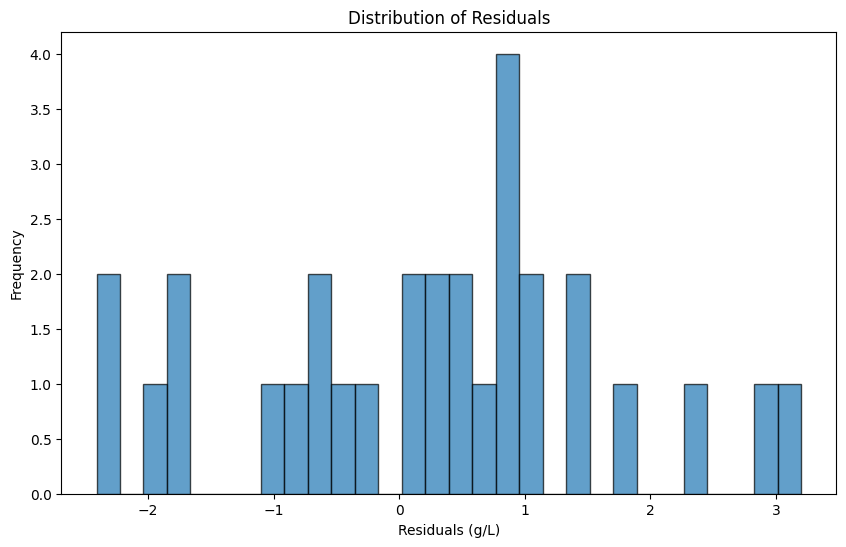

In [5]:
# run statistical tests on residuals distribution
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

lilliefors_test = lilliefors(residuals)
print(
    f"Lilliefors test statistic: {lilliefors_test[0]:.4f}, p-value: {lilliefors_test[1]:.4f}"
)
if lilliefors_test[1] < 0.05:
    print("The residuals do not follow a normal distribution (reject H0).")
else:
    print("The residuals follow a normal distribution (fail to reject H0).")

# check the distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Residuals (g/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

# Kinetic Model predictions for CSP


Accuracy of predictions:
0.5928782013919687
RMSE: 2.0502 g/L


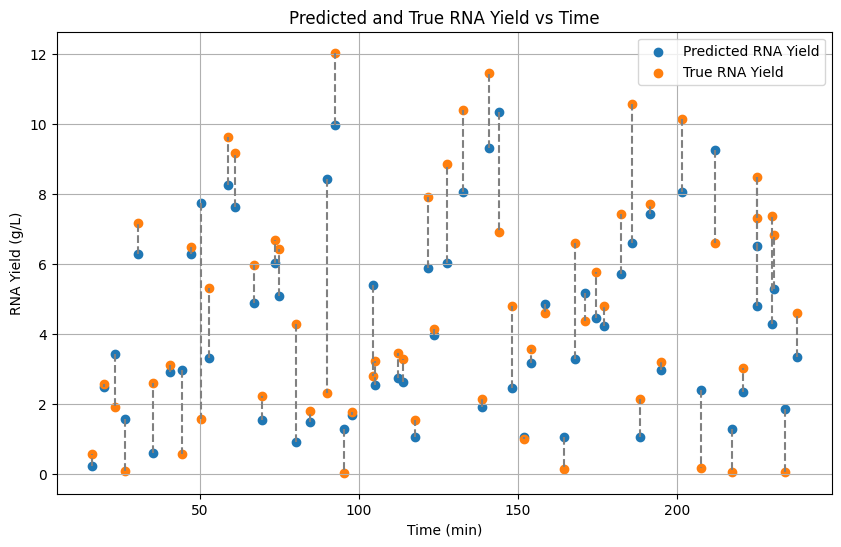

In [6]:
X_columns = [
    schema.IVTReactionSchema.NTP_M.value,
    schema.IVTReactionSchema.T7RNAP_u_uL.value,
    schema.IVTReactionSchema.DNA_ug_mL.value,
    schema.IVTReactionSchema.Mg2_M.value,
    schema.IVTReactionSchema.Spd_M.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "csp_lhs", verbose=False
).get(X_columns=X_columns, y_columns=y_columns)

model = ivt_model.AssimuloIVTModel(template=schema.DNATemplates.CSP)
predictions = model.predict_rna_yield(
    experimental_conditions=experimental_conditions,
    verbose=False,
)

print("Accuracy of predictions:")
print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

# show root mean squared error
rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)
ax = plt.gca()
for i in experimental_conditions[schema.IVTReactionSchema.TIME_min.value]:
    ax.vlines(
        i,
        predictions.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        response.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        color="gray",
        linestyle="--",
    )

plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)
plt.xlabel("Time (min)")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Time")
plt.legend()
plt.grid()
plt.show()

# Residual analysis for both CSP and eGFP


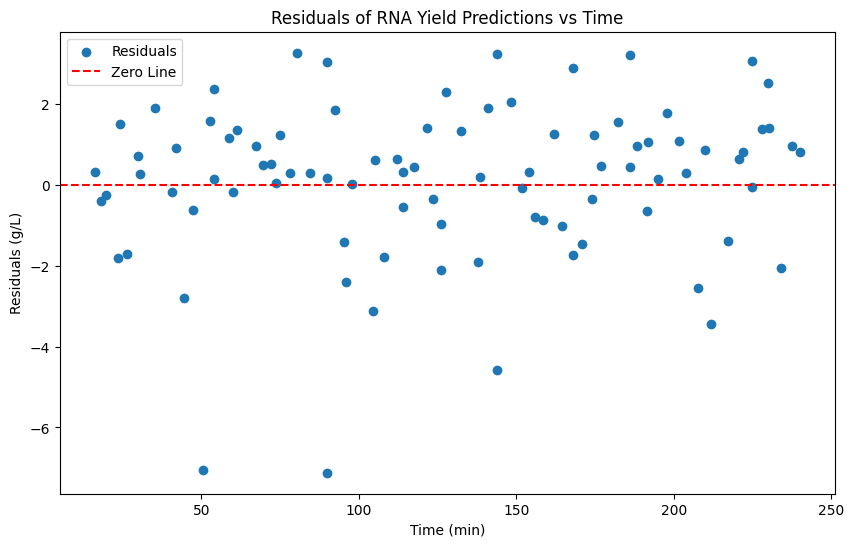

In [7]:
X_columns = [
    schema.IVTReactionSchema.NTP_M.value,
    schema.IVTReactionSchema.T7RNAP_u_uL.value,
    schema.IVTReactionSchema.DNA_ug_mL.value,
    schema.IVTReactionSchema.Mg2_M.value,
    schema.IVTReactionSchema.Spd_M.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "egfp_lhs", verbose=False
).get(
    X_columns=X_columns,
    y_columns=y_columns,
    paths_to_merge=[["csp_lhs", "Definitive Screening Design IVT"]],
)

model = ivt_model.AssimuloIVTModel(template=schema.DNATemplates.ANY)
predictions = model.predict_rna_yield(
    experimental_conditions=experimental_conditions,
    verbose=False,
)

# Plot the residuals of the model
residuals = (
    response[schema.IVTReactionSchema.RNA_g_L.value]
    - predictions[schema.IVTReactionSchema.RNA_g_L.value]
)
plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    residuals,
    marker="o",
    label="Residuals",
)
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.xlabel("Time (min)")
plt.ylabel("Residuals (g/L)")
plt.title("Residuals of RNA Yield Predictions vs Time")
plt.legend()

Lilliefors test statistic: 0.1186, p-value: 0.0048
The residuals do not follow a normal distribution (reject H0).


Text(0.5, 1.0, 'Distribution of Residuals')

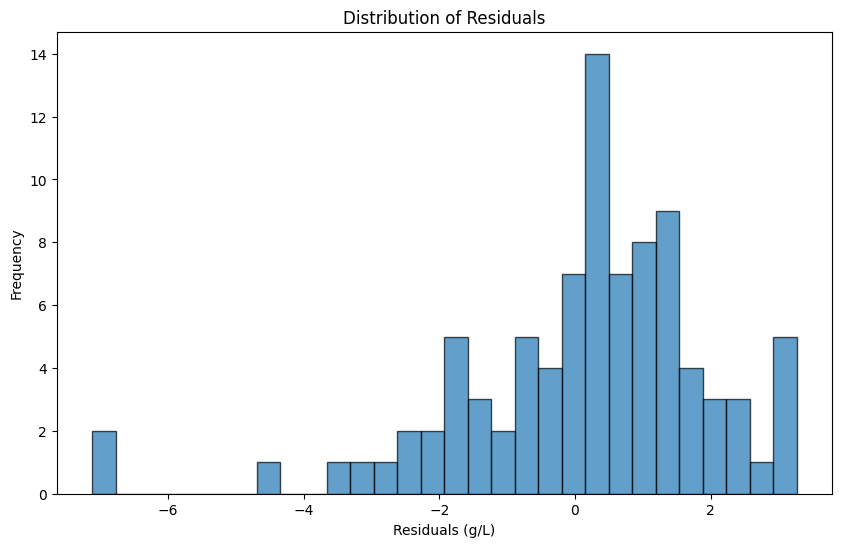

In [8]:
# run statistical tests on residuals distribution
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

lilliefors_test = lilliefors(residuals)
print(
    f"Lilliefors test statistic: {lilliefors_test[0]:.4f}, p-value: {lilliefors_test[1]:.4f}"
)
if lilliefors_test[1] < 0.05:
    print("The residuals do not follow a normal distribution (reject H0).")
else:
    print("The residuals follow a normal distribution (fail to reject H0).")

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Residuals (g/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")